In [10]:
from pathlib import Path
import json
import pandas as pd

In [11]:
def list_json_dir(folder):
    p = Path(folder)

    # list files in dir
    files = [f for f in p.iterdir() if f.suffix == '.json']
    return files

def read_json(f_path):
    with f_path.open('r') as fp:
        json_dict = json.load(fp)
        
    return json_dict

In [12]:
folder = 'results/20201207/'
files = list_json_dir(folder)
json_files = [read_json(f) for f in files]
print(json_files[0])

pd_dict = {
    # running parameters
    'preseeding':[],
    'preseeding-minimal':[],
    'sat-polarity':[],
    'postpone_opt':[],
    'postpone_opt_incr':[],
    'postpone_opt_greedy':[],
    'instance':[],
    'subset_maximal': [],
    'HS':[],
    'HS_greedy':[],
    'HS_incr':[],
    '#expl':[],
    'OUS-time':[],
    'HS-opt-time':[],
    'HS-postpone-time':[],
    'SAT-time':[],
    'timeout':[],
    'config':[],
    'cumul-ous': [],
    'cumul-sat':[],
    'cumul-post':[],
    'cumul-opt':[],
    'cumul-HS': [],
    'cumul-HS-all': [],
}

for f_json in json_files:
    for k, v in f_json['config'].items():
        pd_dict[k].append(v)
    for k, v in f_json['results'].items():
        if k == 'expl_seq':
            continue
        pd_dict[k].append(v)
    add_configs = [f_json['config']['instance']]
    if f_json['config']['preseeding']:
        add_configs.append('pre')
    if f_json['config']['sat-polarity']:
        add_configs.append('satpol')
    if f_json['config']['postpone_opt']:
        add_configs.append('post')
    if f_json['config']['postpone_opt_incr']:
        add_configs.append('incr')
    if f_json['config']['postpone_opt_greedy']:
        add_configs.append('greedy')
    if f_json['config']['subset_maximal']:
        add_configs.append('max')
        
    pd_dict['config'].append('_'.join(add_configs))
    pd_dict['cumul-ous'].append( [sum(f_json['results']['OUS-time'][:i+1]) for i in range(len(f_json['results']['OUS-time'])) ])
    pd_dict['cumul-opt'].append( [sum(f_json['results']['HS-opt-time'][:i+1]) for i in range(len(f_json['results']['HS-opt-time'])) ])
    pd_dict['cumul-post'].append( [sum(f_json['results']['HS-postpone-time'][:i+1]) for i in range(len(f_json['results']['HS-postpone-time'])) ])
    pd_dict['cumul-sat'].append( [sum(f_json['results']['SAT-time'][:i+1]) for i in range(len(f_json['results']['SAT-time'])) ])
    pd_dict['cumul-HS'].append( [sum(f_json['results']['HS'][:i+1]) for i in range(len(f_json['results']['HS'])) ])
    pd_dict['cumul-HS-all'].append( [sum(f_json['results']['HS'][:i+1])+sum(f_json['results']['HS_incr'][:i+1])+sum(f_json['results']['HS_greedy'][:i+1]) for i in range(len(f_json['results']['HS'])) ])

#ignored_cols = ['preseeding','preseeding-minimal','sat-polarity','postpone_opt','postpone_opt_incr','postpone_opt_greedy','subset_maximal']
ignored_cols = []
all_cols = [k for k in pd_dict if k not in ignored_cols]
pd_files = pd.DataFrame(pd_dict)
pd_files_cols = pd_files[all_cols]
pd_files_cols

{'config': {'preseeding': False, 'preseeding-minimal': False, 'sat-polarity': True, 'postpone_opt': False, 'postpone_opt_incr': False, 'postpone_opt_greedy': False, 'subset_maximal': False, 'timeout': 7200, 'instance': 'simple'}, 'results': {'HS': [4, 2, 1], 'HS_greedy': [0, 0, 0], 'HS_incr': [0, 0, 0], 'HS-opt-time': [0.0011448860168457031, 0.0008945465087890625, 0.0002052783966064453], 'HS-postpone-time': [0, 0, 0], 'SAT-time': [0.00039649009704589844, 8.487701416015625e-05, 3.218650817871094e-05], '#expl': 3, 'expl_seq': [{'constraints': [4], 'derived': [1]}, {'constraints': [1, 5, 6], 'derived': [2]}, {'constraints': [2, 7], 'derived': [-3]}], 'OUS-time': [0.05297112464904785, 0.0018551349639892578, 0.0005216598510742188]}}


,preseeding,preseeding-minimal,sat-polarity,postpone_opt,postpone_opt_incr,postpone_opt_greedy,instance,subset_maximal,HS,HS_greedy,...,HS-postpone-time,SAT-time,timeout,config,cumul-ous,cumul-sat,cumul-post,cumul-opt,cumul-HS,cumul-HS-all
0,False,False,True,False,False,False,simple,False,"[4, 2, 1]","[0, 0, 0]",...,"[0, 0, 0]","[0.00039649009704589844, 8.487701416015625e-05...",7200,simple_satpol,"[0.05297112464904785, 0.05482625961303711, 0.0...","[0.00039649009704589844, 0.0004813671112060547...","[0, 0, 0]","[0.0011448860168457031, 0.0020394325256347656,...","[4, 6, 7]","[4, 6, 7]"
1,True,True,True,False,False,False,simple,True,"[3, 2, 1]","[0, 0, 0]",...,"[0, 0, 0]","[0.00010347366333007812, 6.866455078125e-05, 2...",7200,simple_pre_satpol_max,"[0.0010840892791748047, 0.001875162124633789, ...","[0.00010347366333007812, 0.0001721382141113281...","[0, 0, 0]","[0.0007271766662597656, 0.0013031959533691406,...","[3, 5, 6]","[3, 5, 6]"
2,True,True,False,False,False,False,origin-problem-iff,True,[1],[0],...,[0],[0.0005788803100585938],7200,origin-problem-iff_pre_max,[0.032457828521728516],[0.0005788803100585938],[0],[0.02464437484741211],[1],[1]
3,False,False,False,False,False,False,frietkot,True,"[6, 4, 5, 12, 2]","[0, 0, 0, 0, 0]",...,"[0, 0, 0, 0, 0]","[0.0002536773681640625, 0.0001475811004638672,...",7200,frietkot_max,"[0.07038092613220215, 0.0736083984375, 0.13233...","[0.0002536773681640625, 0.0004012584686279297,...","[0, 0, 0, 0, 0]","[0.0018277168273925781, 0.0034415721893310547,...","[6, 10, 15, 27, 29]","[6, 10, 15, 27, 29]"
4,False,False,True,False,False,False,origin-problem-iff,True,"[2, 8]","[0, 0]",...,"[0, 0]","[0.027219057083129883, 0.051197052001953125]",7200,origin-problem-iff_satpol_max,"[0.07090520858764648, 0.17740941047668457]","[0.027219057083129883, 0.07841610908508301]","[0, 0]","[0.0020399093627929688, 0.013026714324951172]","[2, 10]","[2, 10]"
5,False,False,False,False,False,False,origin-problem,True,"[294, 33, 180, 93, 100, 67]","[0, 0, 0, 0, 0, 0]",...,"[0, 0, 0, 0, 0, 0]","[1.6909546852111816, 0.13211655616760254, 0.88...",7200,origin-problem_max,"[49.274001121520996, 90.94954347610474, 286.97...","[1.6909546852111816, 1.8230712413787842, 2.707...","[0, 0, 0, 0, 0, 0]","[43.29905033111572, 84.52117919921875, 277.869...","[294, 327, 507, 600, 700, 767]","[294, 327, 507, 600, 700, 767]"
6,True,True,True,False,False,False,frietkot,True,"[2, 3, 2, 2, 2]","[0, 0, 0, 0, 0]",...,"[0, 0, 0, 0, 0]","[0.00030040740966796875, 0.0001530647277832031...",7200,frietkot_pre_satpol_max,"[0.06592798233032227, 0.06860065460205078, 0.0...","[0.00030040740966796875, 0.0004534721374511719...","[0, 0, 0, 0, 0]","[0.0011754035949707031, 0.002649545669555664, ...","[2, 5, 7, 9, 11]","[2, 5, 7, 9, 11]"
7,False,False,True,False,False,False,frietkot,True,"[4, 2, 3, 2, 2]","[0, 0, 0, 0, 0]",...,"[0, 0, 0, 0, 0]","[0.0002677440643310547, 0.00011777877807617188...",7200,frietkot_satpol_max,"[0.04292011260986328, 0.08217024803161621, 0.0...","[0.0002677440643310547, 0.00038552284240722656...","[0, 0, 0, 0, 0]","[0.001186370849609375, 0.001651763916015625, 0...","[4, 6, 9, 11, 13]","[4, 6, 9, 11, 13]"
8,True,True,True,False,False,False,origin-problem-iff,False,[1],[0],...,[0],[0.024652957916259766],7200,origin-problem-iff_pre_satpol,[0.06548643112182617],[0.024652957916259766],[0],[0.03240180015563965],[1],[1]
9,False,False,False,False,False,False,frietkot,False,"[6, 4, 5, 12, 2]","[0, 0, 0, 0, 0]",...,"[0, 0, 0, 0, 0]","[0.0002624988555908203, 0.0001678466796875, 0....",7200,frietkot,"[0.07567644119262695, 0.09039616584777832, 0.1...","[0.0002624988555908203, 0.0004303455352783203,...","[0, 0, 0, 0, 0]","[0.0015468597412109375, 0.003133535385131836, ...","[6, 10, 15, 27, 29]","[6, 10, 15, 27, 29]"


In [13]:
pd_files_cols[pd_files_cols['instance'] == 'origin-problem']

,preseeding,preseeding-minimal,sat-polarity,postpone_opt,postpone_opt_incr,postpone_opt_greedy,instance,subset_maximal,HS,HS_greedy,...,HS-postpone-time,SAT-time,timeout,config,cumul-ous,cumul-sat,cumul-post,cumul-opt,cumul-HS,cumul-HS-all
5,False,False,False,False,False,False,origin-problem,True,"[294, 33, 180, 93, 100, 67]","[0, 0, 0, 0, 0, 0]",...,"[0, 0, 0, 0, 0, 0]","[1.6909546852111816, 0.13211655616760254, 0.88...",7200,origin-problem_max,"[49.274001121520996, 90.94954347610474, 286.97...","[1.6909546852111816, 1.8230712413787842, 2.707...","[0, 0, 0, 0, 0, 0]","[43.29905033111572, 84.52117919921875, 277.869...","[294, 327, 507, 600, 700, 767]","[294, 327, 507, 600, 700, 767]"
10,False,False,True,False,False,False,origin-problem,True,"[49, 7, 2, 3, 1, 18, 10, 6, 4, 6, 25, 10, 1, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.8547239303588867, 0.07451248168945312, 0.00...",7200,origin-problem_satpol_max,"[4.270492315292358, 6.006310701370239, 6.62056...","[0.8547239303588867, 0.9292364120483398, 0.936...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[2.155384063720703, 3.720766067504883, 4.29971...","[49, 56, 58, 61, 62, 80, 90, 96, 100, 106, 131...","[49, 56, 58, 61, 62, 80, 90, 96, 100, 106, 131..."
13,False,False,True,False,False,False,origin-problem,False,"[40, 24, 1, 4, 3, 15, 3, 13, 5, 6, 16, 8, 7, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.494218111038208, 0.08944106101989746, 0.001...",7200,origin-problem_satpol,"[2.092632293701172, 8.116914749145508, 8.61271...","[0.494218111038208, 0.5836591720581055, 0.5847...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1.1556429862976074, 6.767390489578247, 7.2541...","[40, 64, 65, 69, 72, 87, 90, 103, 108, 114, 13...","[40, 64, 65, 69, 72, 87, 90, 103, 108, 114, 13..."
15,True,True,True,False,False,False,origin-problem,False,"[35, 14, 7, 6, 2, 16, 8, 10, 4, 2, 21, 3, 4, 1...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0.15371108055114746, 0.07345962524414062, 0.0...",7200,origin-problem_pre_satpol,"[4.458460807800293, 9.760828495025635, 11.6217...","[0.15371108055114746, 0.22717070579528809, 0.2...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[3.6191508769989014, 8.718387126922607, 10.470...","[35, 49, 56, 62, 64, 80, 88, 98, 102, 104, 125...","[35, 49, 56, 62, 64, 80, 88, 98, 102, 104, 125..."
17,False,False,False,False,False,False,origin-problem,False,"[294, 33, 180, 93, 100, 67]","[0, 0, 0, 0, 0, 0]",...,"[0, 0, 0, 0, 0, 0]","[1.6165108680725098, 0.09735417366027832, 0.82...",7200,origin-problem,"[48.3024845123291, 87.57921123504639, 283.2469...","[1.6165108680725098, 1.713865041732788, 2.5381...","[0, 0, 0, 0, 0, 0]","[42.975486755371094, 81.84794044494629, 274.98...","[294, 327, 507, 600, 700, 767]","[294, 327, 507, 600, 700, 767]"
20,True,True,False,False,False,False,origin-problem,True,"[153, 37, 83, 142, 108, 133, 113, 38]","[0, 0, 0, 0, 0, 0, 0, 0]",...,"[0, 0, 0, 0, 0, 0, 0, 0]","[0.9149751663208008, 0.1097862720489502, 0.384...",7200,origin-problem_pre_max,"[31.88739776611328, 61.876845836639404, 130.23...","[0.9149751663208008, 1.024761438369751, 1.4090...","[0, 0, 0, 0, 0, 0, 0, 0]","[28.987784147262573, 58.48962092399597, 125.81...","[153, 190, 273, 415, 523, 656, 769, 807]","[153, 190, 273, 415, 523, 656, 769, 807]"
22,True,True,False,False,False,False,origin-problem,False,"[153, 37, 83, 142, 108, 133, 113, 38]","[0, 0, 0, 0, 0, 0, 0, 0]",...,"[0, 0, 0, 0, 0, 0, 0, 0]","[0.7659835815429688, 0.1266636848449707, 0.340...",7200,origin-problem_pre,"[32.45397448539734, 63.2225022315979, 132.4513...","[0.7659835815429688, 0.8926472663879395, 1.233...","[0, 0, 0, 0, 0, 0, 0, 0]","[29.72033190727234, 59.996479511260986, 128.17...","[153, 190, 273, 415, 523, 656, 769, 807]","[153, 190, 273, 415, 523, 656, 769, 807]"
27,True,True,Tru

In [14]:
import matplotlib.pyplot as plt

# Origin problem
def plot_instance_col(df, instance, col):
    df_inst_col = df[df['instance'] == instance][['#expl','config', col]]
    df_inst_col['x'] = df_inst_col[col].apply(lambda x: [i for i in range(1, len(x) + 1)])
    df_inst_col = df_inst_col.sort_values(by=['#expl'], ascending=False)

    plt.figure(figsize=(15,8))
    for i, row in df_inst_col.iterrows():
        plt.plot(row['x'], row[col], label=row['config'])
        
    # Plot formatting
    plt.legend()
    plt.xlabel('Number of explanation steps')
    plt.ylabel('Execution time (s) - timeout [7200s]')
    plt.title(instance + " - " + col)
    
    plt.show()


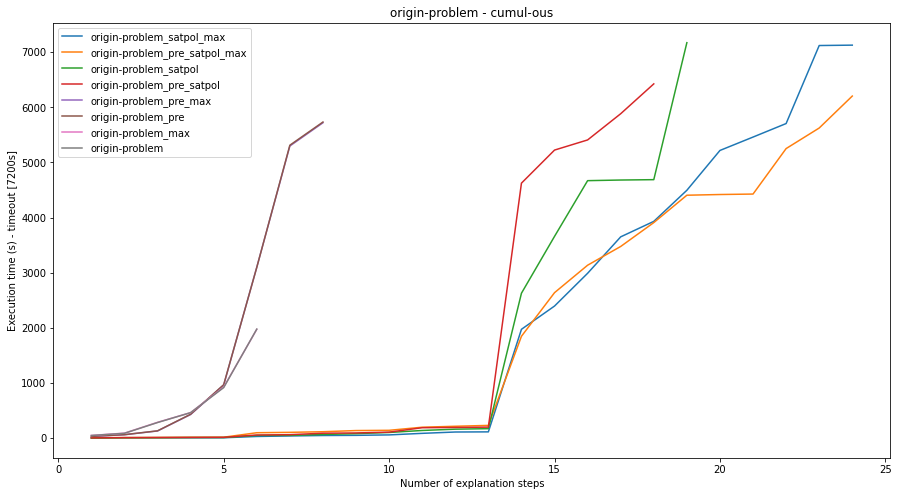

In [15]:
plot_instance_col(pd_files_cols, 'origin-problem', 'cumul-ous')

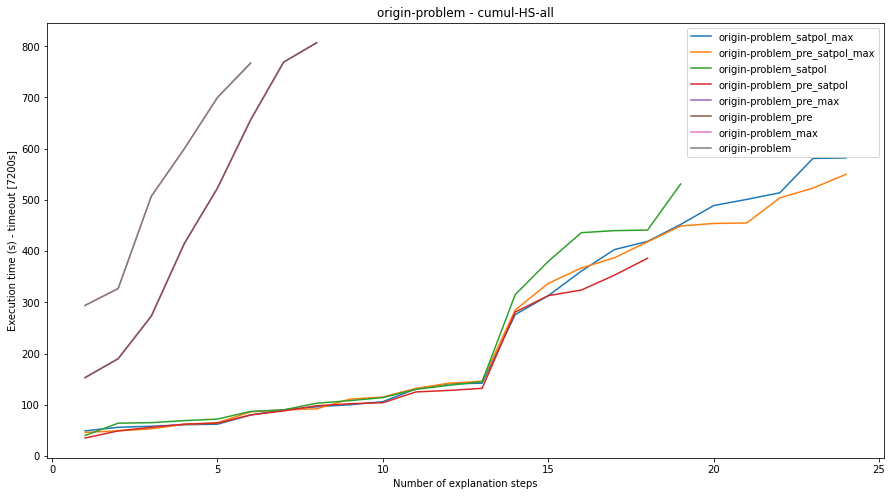

None


In [16]:
print(plot_instance_col(pd_files_cols, 'origin-problem', 'cumul-HS-all'))